# Árboles de decisión

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
datos=pd.read_csv("./Sick_pacientes.txt",sep=";")
datos.head(20)

,caso,edad,genero,depresion,embarazada,cirugía_de_tiroides,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase
0,1,56,F,NO,NO,NO,1.900,2.044,129.00,1.0500,123.00,0
1,2,51,F,NO,NO,NO,0.250,1.900,101.00,1.0800,94.00,0
2,3,50,F,NO,NO,NO,2.000,2.500,133.00,1.0800,123.00,0
3,4,73,M,NO,NO,NO,1.800,2.100,103.00,0.9200,112.00,0
4,5,56,F,NO,NO,NO,3.774,3.900,141.00,1.1200,126.00,0
5,6,44,M,NO,NO,NO,1.900,2.200,103.00,1.2000,86.00,0
6,7,24,F,NO,NO,NO,1.700,2.400,126.00,0.9200,136.00,0
7,8,40,M,NO,NO,NO,0.250,2.300,134.00,0.8400,160.00,0
8,9,81,M,NO,NO,NO,1.300,1.200,147.00,1.0600,138.00,0
9,10,53,F,NO,NO,NO,0.850,2.000,103.00,0.9300,111.00,0


1.	 Separe la variable clase a predecir en una variable Y.
2.	 Separe un conjunto de datos denominado X que no contenga la variable clase.

In [123]:
Y=datos['clase']
X=datos.drop(columns=['clase'])

3.	 Transforme las variables categóricas de X a dummies.

In [124]:
X_dummies=pd.get_dummies(X,drop_first=True)

4.	 Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla que utilizó). Indique que cantidad de casos quedaron para cada ambiente).

In [125]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))


print("Enfermos train:",y_train[y_train==1].count())
print("No Enfermos train:",y_train[y_train==0].count())

print("Enfermos test:",y_test[y_test==1].count())
print("No Enfermos test",y_test[y_test==0].count())

Total ejemplos train 668.
Total ejemplos test 287.
Enfermos train: 35
No Enfermos train: 633
Enfermos test: 13
No Enfermos test 274


5.	 Ajuste 3 árboles de decisión de diferentes profundidades (max_depth) usando el conjunto de entrenamiento 70%.

In [126]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_leaf=10,
                                            max_depth = 4
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [127]:
print(modelo1.get_depth())
print(modelo1.get_n_leaves())

4
7


In [128]:
# Crear Arbol de decision con profundidad = 10
modelo2 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            #min_samples_leaf=10,
                                            max_depth = 10
                                           )
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [129]:
# Crear Arbol de decision con profundidad = 4
modelo3 = tree.DecisionTreeClassifier(criterion='entropy',
                                             ccp_alpha=0.01
      )
modelo3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

In [130]:
modelo3.get_depth()

3

6.	Seleccione el mejor modelo con la métrica accuracy_balanced  variando los parámetros e iterando cada uno de ellos sobre el método de validación cruzada kfold=5 en el set de entrenamiento.

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score,f1_score


def _score_func(estimator, X, y):
    y_pred_test = estimator.predict(X)
    return balanced_accuracy_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.balanced_accuracy_score(Y, self.predictions)))
from sklearn.model_selection import GridSearchCV

In [138]:
%%time
gb = Class_Fit(clf = tree.DecisionTreeClassifier)
param_grid = {
             'criterion':['entropy'],
             'ccp_alpha':[0,0.0025,0.0050,0.0075,0.008,0.0085,0.01,0.05],
             }


gb.grid_search(parameters = param_grid, Kfold = 10)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros árbol:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros árbol: {'ccp_alpha': 0.05, 'criterion': 'entropy'}
Wall time: 490 ms


In [135]:
params=  {'ccp_alpha': 0.05, 'criterion': 'entropy'}
modelo4=  tree.DecisionTreeClassifier(**params)
modelo4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy')

In [119]:
gb.grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.0025, 0.005, 0.0075, 0.008, 0.0085,
                                       0.01, 0.05],
                         'criterion': ['entropy']},
             scoring=<function _score_func at 0x000001D8BF614C10>)

7.	 Grafique los árboles 

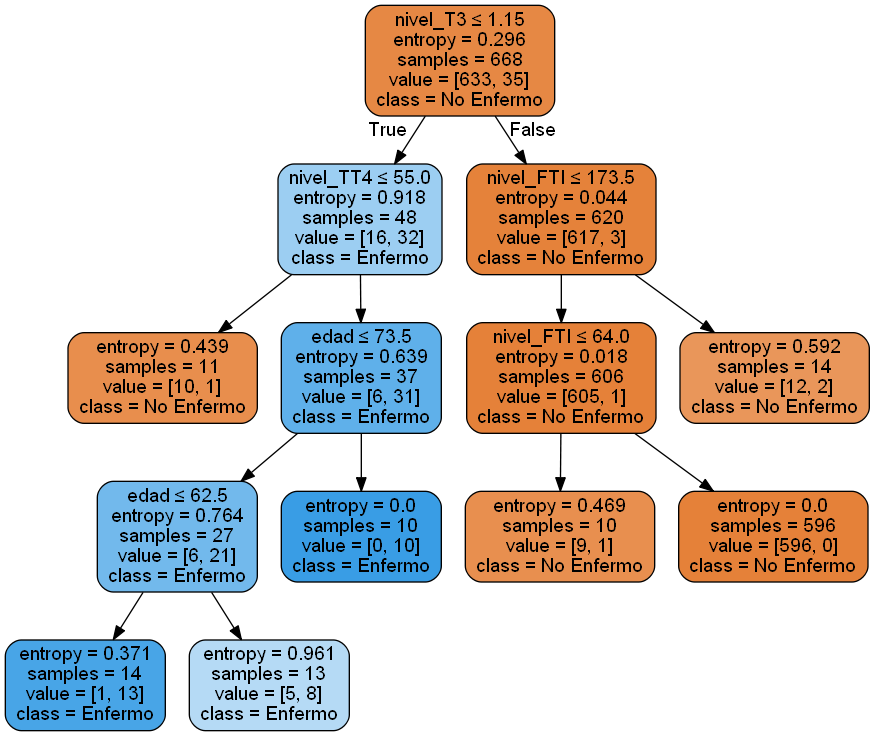

In [137]:
import os
from six import StringIO 
#conda install -c conda-forge pydotplus
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#https://graphviz.org/download/
#conda install -c anaconda graphviz
#conda install python-graphviz
#pip install graphviz
#pip install pydotplus
#from sklearn.externals.six import StringIO 
# from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Enfermo','Enfermo'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

8.	Calcular la precisión, recall, accuracy y accuracy_balanced en los ambientes de entrenamiento y validación de cada modelo.

In [121]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,classification_report,balanced_accuracy_score


def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    # Select (prediction, true label) and compute test error
    print("accuracy test:",accuracy_score(y_test, predictions_test))
    print("accuracy train:",accuracy_score(y_train, predictions_train))
    
    print("Balanced_accuracy test:",balanced_accuracy_score(y_test, predictions_test))
    print("Balanced_accuracy train:",balanced_accuracy_score(y_train, predictions_train))
    
    print(classification_report(y_test,predictions_test))
      
    return (balanced_accuracy_score(y_test, predictions_test))
print("_________________________________________")
print("Modelo 1")
eval_model(X_test,X_train,y_test,y_train,modelo1)
print("_________________________________________")
print("Modelo 2")
eval_model(X_test,X_train,y_test,y_train,modelo2)
print("_________________________________________")
print("Modelo 3")
eval_model(X_test,X_train,y_test,y_train,modelo3)
print("_________________________________________")
print("Modelo 4")
eval_model(X_test,X_train,y_test,y_train,modelo4)
print("_________________________________________")

_________________________________________
Modelo 1
accuracy test: 0.9895470383275261
accuracy train: 0.9820359281437125
Balanced_accuracy test: 0.9212521055586749
Balanced_accuracy train: 0.9365380275332882
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       274
           1       0.92      0.85      0.88        13

    accuracy                           0.99       287
   macro avg       0.95      0.92      0.94       287
weighted avg       0.99      0.99      0.99       287

_________________________________________
Modelo 2
accuracy test: 0.9895470383275261
accuracy train: 0.9910179640718563
Balanced_accuracy test: 0.8846153846153846
Balanced_accuracy train: 0.9142857142857144
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       274
           1       1.00      0.77      0.87        13

    accuracy                           0.99       287
   macro avg       0.99      0.88      0.

9.	Validar las métricas con validación cruzada en cada modelo.

In [38]:
from sklearn.model_selection import StratifiedKFold

def eval_model_alt(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    return (balanced_accuracy_score(y_test, predictions_test))

def validacion_cruzada(x_train,y_train,kfolds,model):
    cv = StratifiedKFold(n_splits=kfolds,shuffle=False)
    prom=[]
    for train,test in cv.split(x_train,y_train):
        modelo=model.fit(x_train.iloc[train],y_train.iloc[train])
        prom.append(eval_model_alt(x_train.iloc[test],x_train.iloc[train] ,y_train.iloc[test],y_train.iloc[train],modelo))
    return(prom)

In [39]:
#modelo1
promM1=validacion_cruzada(X_dummies,Y,5,modelo1)
print(promM1)
sum(promM1)/len(promM1)

[0.9972527472527473, 0.9416971916971917, 0.8972375690607735, 0.9472375690607735, 0.8389502762430938]


0.9244750706629159

In [40]:
#modelo2
promM2=validacion_cruzada(X_dummies,Y,5,modelo2)
print(promM2)
sum(promM2)/len(promM2)

[0.9416971916971917, 0.9416971916971917, 0.894475138121547, 0.944475138121547, 0.55]


0.8544689319274955

In [41]:
#modelo3
promM3=validacion_cruzada(X_dummies,Y,5,modelo3)
print(promM3)
sum(promM3)/len(promM3)

[0.9972527472527473, 0.9416971916971917, 0.8972375690607735, 0.9472375690607735, 0.55]


0.8666850154142972

In [42]:
#modelo3
promM4=validacion_cruzada(X_dummies,Y,5,modelo4)
print(promM4)
sum(promM4)/len(promM4)

[0.9972527472527473, 0.9416971916971917, 0.8972375690607735, 0.9472375690607735, 0.8389502762430938]


0.9244750706629159

In [18]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeClassifier(criterion='entropy',
                                            #min_samples_split=100,
                                            min_samples_leaf=10,
                                            max_depth = 4
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [19]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

10.	Obtener la matriz de confusión tanto para el ambiente de entrenamiento como de Validación del mejor modelo.

Confusion matrix, without normalization
verdaderos positivos: 11
verdaderos negativos: 274
falsos positivos: 0
falsos negativos: 2
accuracy: 0.9930313588850174
accuracy balanced: 0.9230769230769231


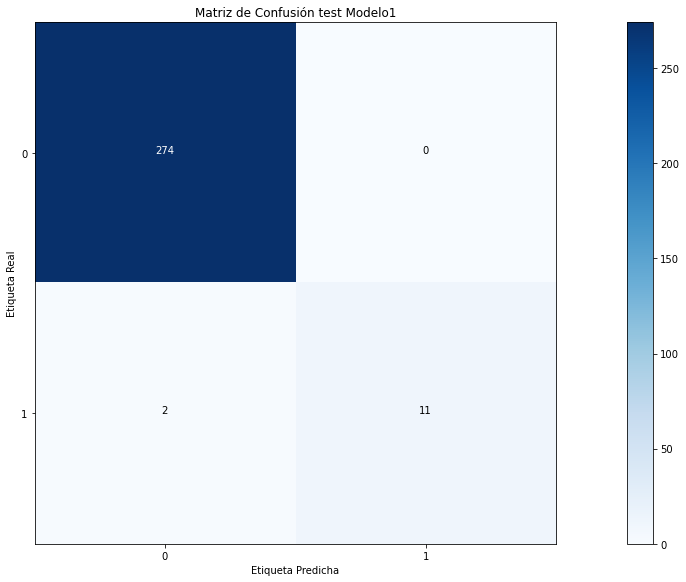

In [20]:
import numpy as np
class_names = [i for i in range(2)]

cnf_matrix = confusion_matrix(y_test, modelo1.predict(X_test)) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión test Modelo1')


tn, fp, fn, tp = confusion_matrix(y_test,modelo1.predict(X_test)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

Confusion matrix, without normalization
verdaderos positivos: 31
verdaderos negativos: 627
falsos positivos: 6
falsos negativos: 4
accuracy: 0.9850299401197605
accuracy balanced: 0.9381178063642519


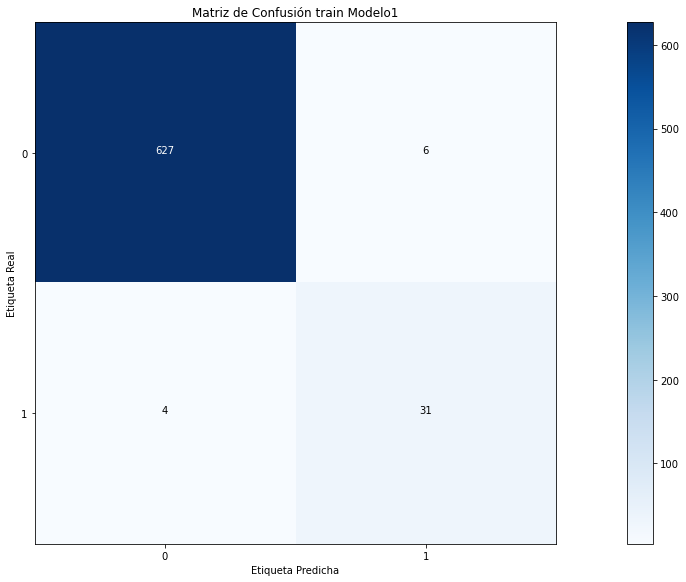

In [21]:
import numpy as np
class_names = [i for i in range(2)]

cnf_matrix = confusion_matrix(y_train, modelo1.predict(X_train)) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión train Modelo1')


tn, fp, fn, tp = confusion_matrix(y_train,modelo1.predict(X_train)).ravel()

print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy:",accuracy)
accuracy_balanced=((tn/(tn+fp))+(tp/(tp+fn)))/2
print("accuracy balanced:",accuracy_balanced)

11.	Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la siguiente lógica. 

Entregue los resultados indicados: Al azar e indique la cantidad de individuos que están enfermos.

Utilizando el mejor modelo desarrollado ordene los individuos de mayor a menor probabilidad de padecer la enfermedad, indique la cantidad de individuos que están enfermos.

In [22]:
n=len(y_test)


n_25=(n*25)/100

print("Total datos test:",n)
print("25% de los individuos en el ambiente de test:",int(n_25))
y_test_25=y_test.sample(int(n_25))
print("Cantidad de enfermos alzar 25% test:",y_test_25[y_test_25==1].count())
#y_test.sample(n=25)

Total datos test: 287
25% de los individuos en el ambiente de test: 71
Cantidad de enfermos alzar 25% test: 6


In [23]:
probs_test = modelo1.predict_proba(X_test)    
y_pred_test= modelo1.predict(X_test)    

data_set_test=X_test.copy()

data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['predicho']=y_pred_test
data_set_test['real']=y_test

data_set_test.sort_values(['predicho_prob_1'],ascending=[False]).head(10)

,caso,edad,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,genero_M,depresion_SI,embarazada_SI,cirugía_de_tiroides_SI,predicho_prob_1,predicho_prob_0,predicho,real
951,824,85,0.25,1.1,132.0,0.85,154.0,1,0,0,0,1.000000,0.000000,1,1
944,651,81,1.90,0.3,102.0,0.96,106.0,1,0,0,0,1.000000,0.000000,1,1
946,733,89,0.80,0.6,101.0,0.73,138.0,1,0,0,0,1.000000,0.000000,1,1
913,168,75,2.40,0.2,78.0,0.56,139.0,1,0,0,0,1.000000,0.000000,1,1
937,565,75,4.50,1.1,132.0,1.01,131.0,0,0,0,0,1.000000,0.000000,1,1
930,461,35,0.20,1.0,68.0,0.88,78.0,1,0,0,0,0.928571,0.071429,1,1
939,567,19,3.70,1.1,126.0,0.91,138.0,0,0,0,0,0.928571,0.071429,1,1
911,78,48,1.60,1.0,71.0,0.81,88.0,0,1,0,0,0.928571,0.071429,1,1
915,170,62,13.00,1.1,87.0,0.81,107.0,1,0,0,0,0.928571,0.071429,1,1
943,650,69,0.50,0.8,87.0,0.89,98.0,0,0,0,0,0.615385,0.384615,1,1


In [24]:
y_test_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[0:y_test_25.count()]
print("Cantidad de enfermos modelo 25% test",len(y_test_modelo[y_test_modelo['real'] == 1]))


print("Cantidad individuos modelo:",len(y_test_modelo))
print("Cantidad individuos alzar:",len(y_test_25))

Cantidad de enfermos modelo 25% test 13
Cantidad individuos modelo: 71
Cantidad individuos alzar: 71
